 Link to the Notebook : [BA810_FinalProject_Team12](https://colab.research.google.com/drive/1JoWFKBmFTm8GK-YfXhhhGOI-N1ax93sc?usp=sharing)

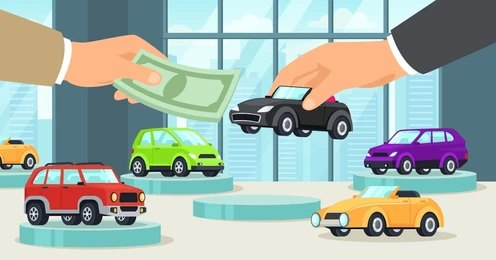

**Automobile Pricing Model for Go-To-Market Strategy**
==============




---


**Team Members**:

Glenn Castellino

Raskirt Bhatia

Hyunjin Yu

Sidhant Sidhant





---


# **Executive Summary**

This project aimed to build a predictive model to estimate car prices in the US market for a leading automobile manufacturer entering the competitive landscape with a new local manufacturing unit. The goal was to identify significant pricing factors and evaluate their impact on price variations. We explored several machine learning models, including Linear Regression, Ridge Regression, Lasso Regression, Decision Tree, Random Forest, Gradient Boosting (GB), and XGBoost. After rigorous testing, Random Forest emerged as the most effective model, outperforming others in terms of accuracy and predictive performance. Through feature engineering and analysis, we identified the key predictors influencing car pricing, such as engine specifications, vehicle age, and other critical attributes. These insights offer actionable guidance for strategic pricing and market positioning, enabling the company to align its product offerings with market expectations and competitive dynamics in the US market.














---



# **Introduction & Problem Statement**

A leading automobile manufacturer is entering the competitive US market by establishing a local manufacturing unit to produce cars domestically and compete with established US and European players. To ensure a successful market entry, the company aims to identify and understand the key factors influencing car pricing in the American market, which may differ from its home market. This project seeks to build a predictive model to estimate car prices using features such as engine specifications, vehicle age, and other relevant attributes. The workflow will involve data cleaning, preprocessing, feature engineering, exploratory analysis, and the application of regression models like Lasso and Ridge Regression. The goal is to deliver a robust, interpretable model that provides actionable insights, aligns with best practices in machine learning, and supports competitive pricing strategies for market entry.



---



# **About the Data**



## Data Source

The data has been downloaded from [Kaggle](https://www.kaggle.com/datasets/sidharth178/car-prices-dataset) and the data has been collated into this source from various open source websites like www.cars-data.com and [cars24.com](https://www.cars24.com)

---



## Data Description
Dataset Overview :
* Total Rows: 19,236 entries
*  Total Columns: 17 features
*  Target Variable: Price (price of the car in USD)


    


| **Feature**       | **Description**                           | **Datatype**     |
|---------------------------|-------------------------------------------|------------------|
| **Price**                | Price of the vehicle                     | int64           |
| **Levy**                 | Additional levy on the vehicle            | object          |
| **Manufacturer**         | Manufacturer of the vehicle               | object          |
| **Model**                | Model of the vehicle                      | object          |
| **Prod. year**           | Production year of the vehicle            | int64           |
| **Category**             | Vehicle category                          | object          |
| **Leather interior**     | Indicates if the vehicle has leather interior | object          |
| **Fuel type**            | Type of fuel used by the vehicle          | object          |
| **Engine volume**        | Engine volume (liters)                    | object          |
| **Mileage**              | Mileage covered by the vehicle            | object          |
| **Cylinders**            | Number of engine cylinders                | int64           |
| **Gear box type**        | Type of gearbox                           | object          |
| **Drive wheels**         | Drive wheel configuration                 | object          |
| **Doors**                | Number of doors on the vehicle            | object          |
| **Wheel**                | Indicates left-hand or right-hand drive   | object          |
| **Color**                | Color of the vehicle                      | object          |
| **Airbags**              | Number of airbags in the vehicle          | int64           |





---



# **Data Loading**




## Importing Necessary Libraries

In [ ]:
# Importing Numpy & Pandas for data processing & data wrangling
import numpy as np
import pandas as pd

# Importing  tools for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Import preprocessing libraries
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Import Model
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
import xgboost as xgb

# Import evaluation metric libraries
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.metrics import balanced_accuracy_score, make_scorer

# Import model selection libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

# Import tree for visualization
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG,display
from graphviz import Source

# Library used for ignore warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Mounting Google Drive
The data is hosted on Google drive. We save it into `/content/drive` by mounting the drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
data_folder = '/content/drive/MyDrive/Data/'
file_name = data_folder+'car_prices.csv'

Mounted at /content/drive


## Loading and Exploring the Dataset

In [ ]:
df = pd.read_csv(file_name, index_col = 0)
display(df.head())
print("\n")
display(df.info())

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
ID,,,,,,,,,,,,,,,,,
45761204,872946,2067,LAMBORGHINI,Urus,2019,Universal,Yes,Petrol,4,2531 km,8,Tiptronic,4x4,4-May,Left wheel,Black,0
45795524,627220,-,MERCEDES-BENZ,G 65 AMG 63AMG,2020,Jeep,Yes,Petrol,6.3 Turbo,0 km,8,Tiptronic,4x4,4-May,Left wheel,Black,12
45810285,308906,1694,PORSCHE,911,2016,Coupe,Yes,Petrol,4,8690 km,6,Automatic,Rear,2-Mar,Left wheel,Black,12
45229113,297930,-,MERCEDES-BENZ,AMG GT S,2015,Coupe,Yes,Petrol,4.0 Turbo,20000 km,8,Tiptronic,Rear,2-Mar,Left wheel,White,16
45792307,297930,-,LAND ROVER,Range Rover Vogue,2019,Jeep,Yes,Diesel,3.0 Turbo,4500 km,8,Tiptronic,4x4,4-May,Left wheel,Black,12




<class 'pandas.core.frame.DataFrame'>
Index: 19236 entries, 45761204 to 45772201
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Price             19236 non-null  int64 
 1   Levy              19236 non-null  object
 2   Manufacturer      19236 non-null  object
 3   Model             19236 non-null  object
 4   Prod. year        19236 non-null  int64 
 5   Category          19236 non-null  object
 6   Leather interior  19236 non-null  object
 7   Fuel type         19236 non-null  object
 8   Engine volume     19236 non-null  object
 9   Mileage           19236 non-null  object
 10  Cylinders         19236 non-null  int64 
 11  Gear box type     19236 non-null  object
 12  Drive wheels      19236 non-null  object
 13  Doors             19236 non-null  object
 14  Wheel             19236 non-null  object
 15  Color             19236 non-null  object
 16  Airbags           19236 non-null  int64 
dtypes: in

None

# **Data Preparation**




## Data Cleaning

*   **Filtering the dataset**: We filter the dataset to remove cars priced under USD1000 (As they're suspected to be older/ used beyond expected age) and over USD100,000 (As the car company aims to cater to the non-luxury working class demographic). We also filter the dataset to remove rows where `Engine volume` is 0. We filter out the column where `Wheel` is 'Left wheel' as cars in the US are Left Wheel Drive.
*   **Cleaning the data for uniformity**: We clean the `Door`, `Engine Volume` and `Mileage` columns to change datatype and make uniform.
*   **Dropping Columns**: We drop the columns `Levy`, `Manufacturer`,`Model` & `Wheel` as they show high cardinality and are not necessary for our use case.




In [ ]:
# Filter out cars priced under $1000
df = df[df['Price'] >= 1000].copy()

# Filter dataset for cars priced under $100,000
df = df[df['Price'] < 100000].copy()

# Keep only rows where 'Wheel' is 'Left wheel'
df = df[df['Wheel'] == 'Left wheel']

# Clean the 'Doors' column
df['Doors'] = df['Doors'].replace('>5', '6')  # Replace '>5' with '6'
df['Doors'] = df['Doors'].str[0].astype(int)

# Clean the 'Mileage' column
df['Mileage'] = df['Mileage'].str.replace('km', '', regex=False).str.strip()  # Remove 'km' and strip whitespace
df['Mileage'] = pd.to_numeric(df['Mileage'])  # Convert to numeric

df.drop(columns=['Levy','Manufacturer', 'Model', 'Wheel'], inplace=True)


## Feature Engineering

We create 2 new columns
*   `Engine Type` Derived from the `Engine volume` column and contains values - Turbo & Non-Turbo.
*   `Age` Calculated from `Prod. year`


In [ ]:
# Extract 'Turbo' information into a new column 'Engine Type'
df['Engine Type'] = df['Engine volume'].apply(lambda x: 'Turbo' if 'Turbo' in str(x) else 'Non-Turbo')

# Clean the 'Engine volume' column
df['Engine volume'] = df['Engine volume'].str.extract(r'(\d+\.?\d*)').astype(float)  # Extract numeric part and convert to float

# Remove rows where 'Engine volume' is 0
df = df[df['Engine volume'] != 0]

# Create 'Age' column
df['Age'] = 2024 - df['Prod. year']

#Drop the Prod. year column
df.drop(columns=['Prod. year'], inplace=True)


In [ ]:
# Print the cleaned DataFrame to check changes
print("Data cleaning complete. Here's a preview of the cleaned dataset:\n")
display(df.head())
print("\n")
# Summary statistics for numeric columns
df.describe()

Data cleaning complete. Here's a preview of the cleaned dataset:



,Price,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Color,Airbags,Engine Type,Age
ID,,,,,,,,,,,,,,
45804437,99440,Jeep,Yes,Hybrid,2.5,40450,4,Automatic,Front,4,White,4,Non-Turbo,8
45808855,99440,Jeep,Yes,Petrol,2.3,44643,4,Automatic,Front,4,Black,4,Non-Turbo,7
45781828,98787,Jeep,Yes,Petrol,4.6,76000,8,Tiptronic,4x4,4,Grey,12,Non-Turbo,10
45808865,98282,Jeep,Yes,Petrol,3.5,20000,4,Automatic,Front,4,White,4,Non-Turbo,7
45802548,98066,Minivan,Yes,Diesel,2.2,17632,4,Automatic,Front,4,White,4,Non-Turbo,5


,Price,Engine volume,Mileage,Cylinders,Doors,Airbags,Age
count,15206.000000,15206.000000,1.520600e+04,15206.000000,15206.000000,15206.000000,15206.000000
mean,19708.092595,2.301164,1.280448e+06,4.547284,3.926739,6.512166,12.908326
std,15553.709089,0.840013,4.384794e+07,1.166267,0.444365,4.133383,5.641150
min,1000.000000,0.100000,0.000000e+00,1.000000,2.000000,0.000000,4.000000
25%,9252.000000,1.800000,6.820000e+04,4.000000,4.000000,4.000000,9.000000
50%,15994.000000,2.000000,1.222100e+05,4.000000,4.000000,4.000000,12.000000
75%,25089.000000,2.500000,1.840000e+05,4.000000,4.000000,12.000000,14.000000
max,99440.000000,20.000000,2.147484e+09,16.000000,6.000000,16.000000,71.000000


We notice a major discrepancy in the `Age` and `Mileage` columns where entries as high as "71" and "2147483647" respectively, are observed. We use the **IQR** method to eliminate such outliers

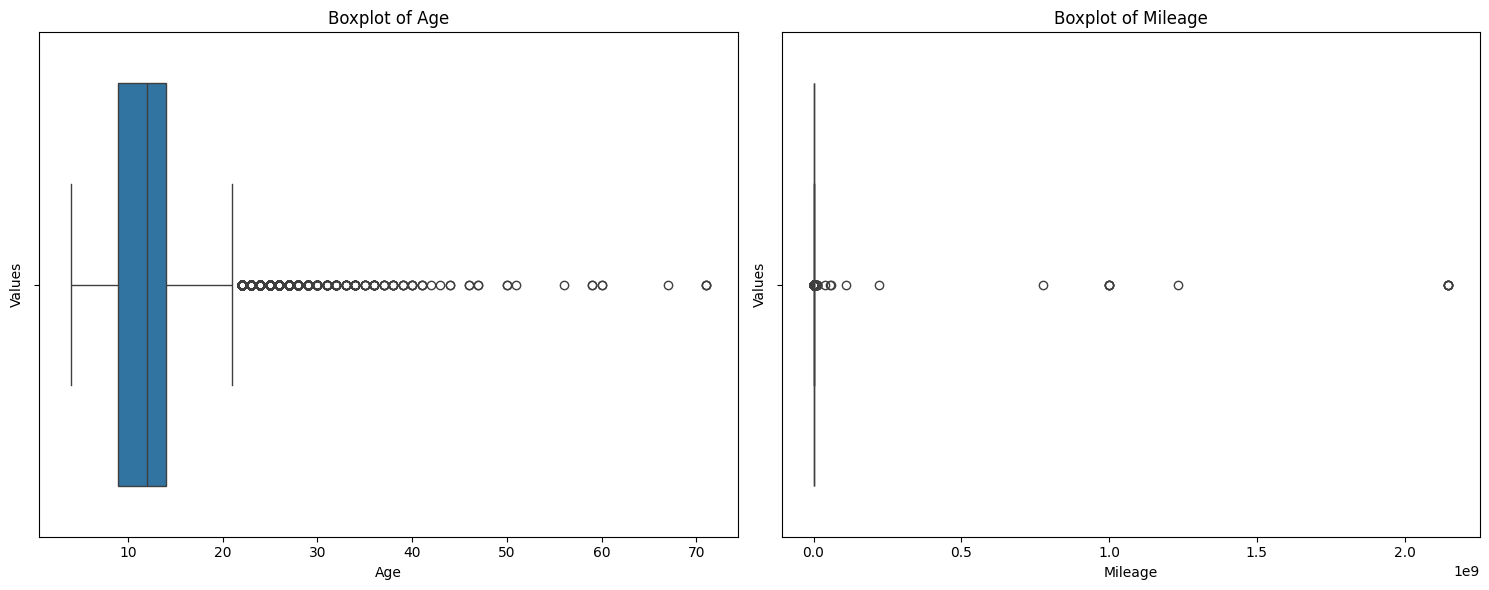

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


# Create a figure with two subplots having separate y-axes
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Boxplot for Age on its own y-axis
sns.boxplot(x=df['Age'], ax=ax[0])
ax[0].set_title('Boxplot of Age')
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Values')

# Boxplot for Mileage on its own y-axis
sns.boxplot(x=df['Mileage'], ax=ax[1])
ax[1].set_title('Boxplot of Mileage')
ax[1].set_xlabel('Mileage')
ax[1].set_ylabel('Values')

# Adjust layout to avoid overlapping
plt.tight_layout()
plt.show()


In [ ]:
# Calculate the IQR for 'Age'
Q1_age = df['Age'].quantile(0.25)
Q3_age = df['Age'].quantile(0.75)
IQR_age = Q3_age - Q1_age

# Define the upper bound for acceptable 'Age' values
upper_bound_age = Q3_age + 1.5 * IQR_age

# Print the upper bound for 'Age'
print(f"Age Upper Bound: {upper_bound_age}")

# Remove rows where 'Age' exceeds the upper bound
df = df[df['Age'] <= upper_bound_age]


Age Upper Bound: 21.5


In [ ]:
# Calculate the IQR for 'Mileage'
Q1_mileage = df['Mileage'].quantile(0.25)
Q3_mileage = df['Mileage'].quantile(0.75)
IQR_mileage = Q3_mileage - Q1_mileage

# Define the upper bound for acceptable 'Mileage' values
upper_bound_mileage = Q3_mileage + 1.5 * IQR_mileage

# Print the upper bound for 'Mileage'
print(f"Mileage Upper Bound: {upper_bound_mileage}")

# Remove rows where 'Mileage' exceeds the upper bound
df = df[df['Mileage'] <= upper_bound_mileage]


Mileage Upper Bound: 335750.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13203 entries, 45804437 to 45808906
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             13203 non-null  int64  
 1   Category          13203 non-null  object 
 2   Leather interior  13203 non-null  object 
 3   Fuel type         13203 non-null  object 
 4   Engine volume     13203 non-null  float64
 5   Mileage           13203 non-null  int64  
 6   Cylinders         13203 non-null  int64  
 7   Gear box type     13203 non-null  object 
 8   Drive wheels      13203 non-null  object 
 9   Doors             13203 non-null  int64  
 10  Color             13203 non-null  object 
 11  Airbags           13203 non-null  int64  
 12  Engine Type       13203 non-null  object 
 13  Age               13203 non-null  int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 1.5+ MB


# **Exploratory Data Analysis**




## Analyze the Distribution of Target Variable (Price)

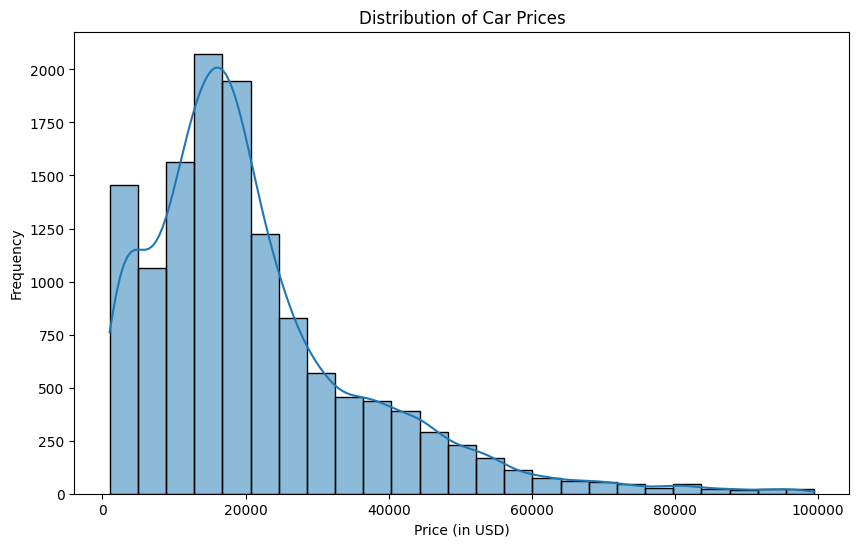


Price Skewness: 1.54


In [ ]:
# Step 1: Visualize the distribution of the target variable (Price)
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=25, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price (in USD)')
plt.ylabel('Frequency')
plt.show()

# Step 2: Check skewness
price_skewness = df['Price'].skew()
print(f"\nPrice Skewness: {price_skewness:.2f}")

As we notice, the skewness of the Target Variable is moderately high. We can reduce this by applying the **Log Transform** method.

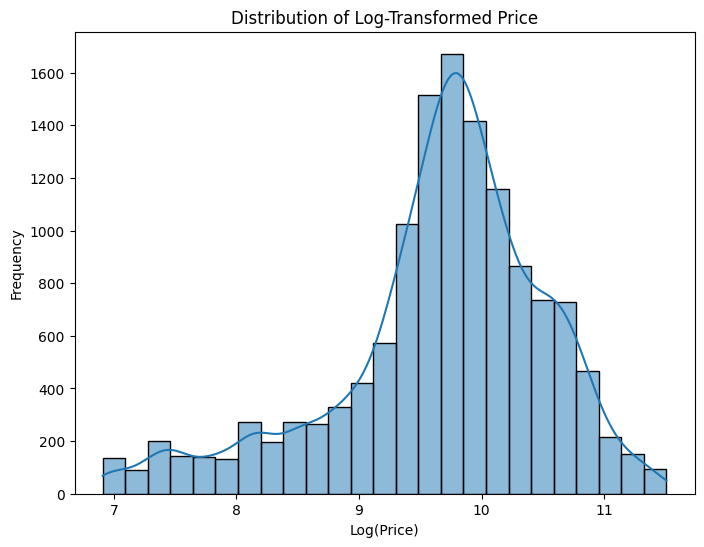

Price Skewness: -0.88


In [ ]:
# Apply log transformation to 'Price' (log(Price + 1) to handle zero prices if necessary)
df['Log_Price'] = np.log1p(df['Price'])

# Plot the transformed distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Log_Price'], kde=True, bins=25)
plt.title('Distribution of Log-Transformed Price')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')
plt.show()

# Check skewness of 'Price'
skewness = df['Log_Price'].skew()
print(f"Price Skewness: {skewness:.2f}")


## Visualize Relationships between Numerical Features and Target Variable

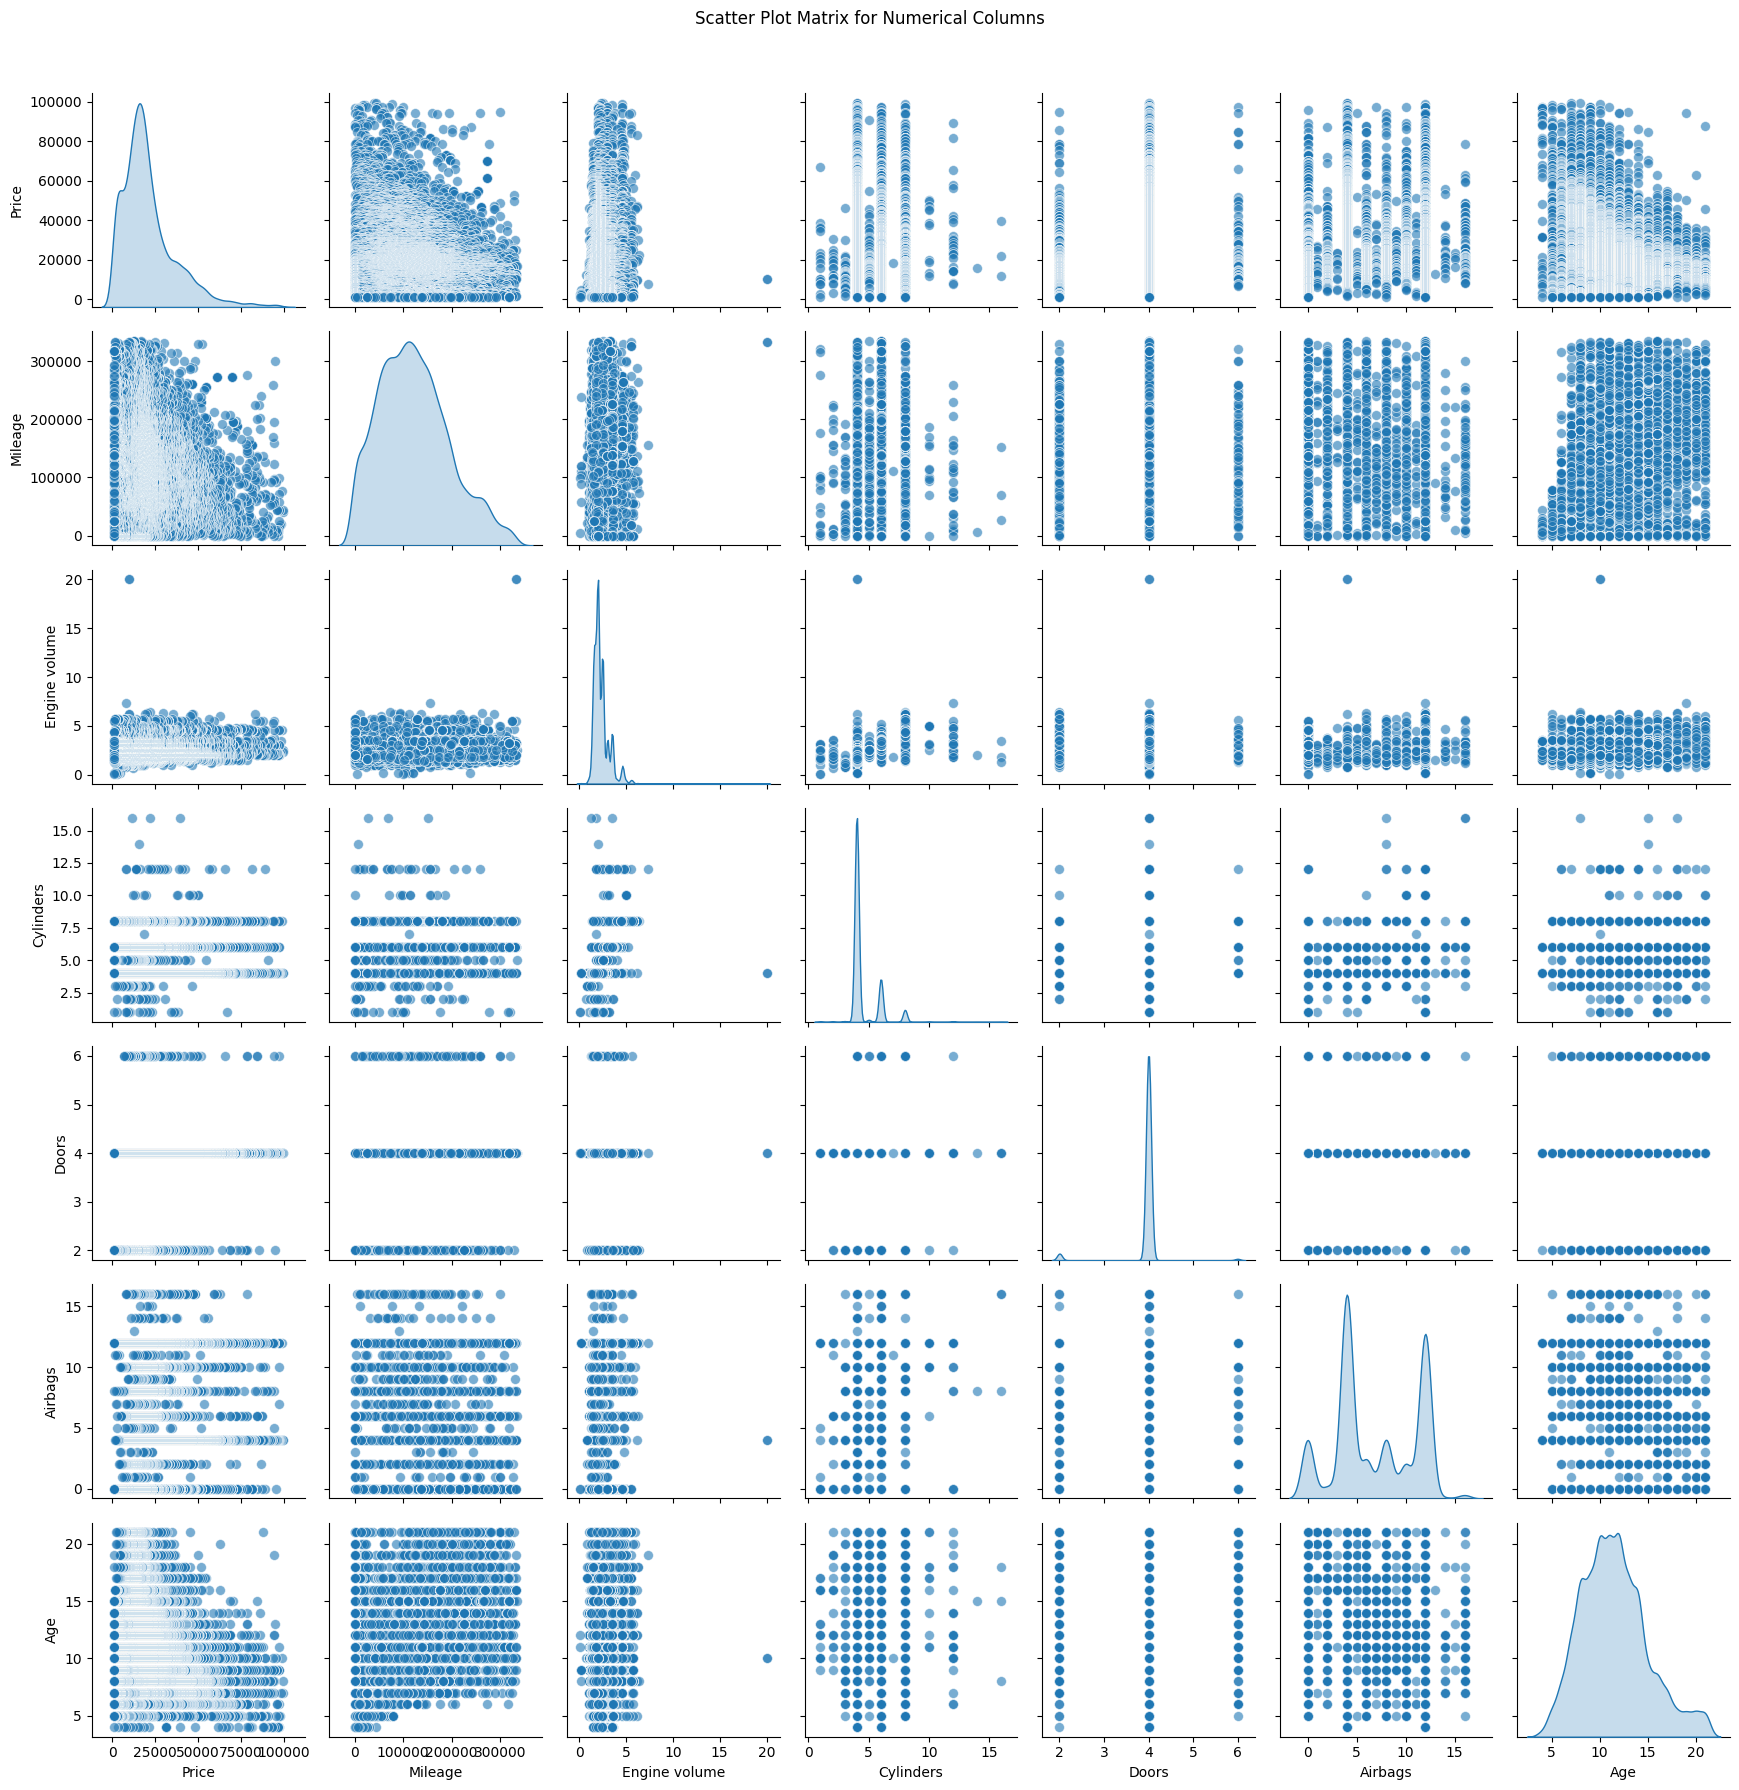

In [ ]:

# Select only numerical columns
numerical_columns = ['Price', 'Mileage', 'Engine volume', 'Cylinders', 'Doors', 'Airbags', 'Age']
numerical_df = df[numerical_columns]

# Create a scatter plot matrix (Pairplot)
sns.pairplot(
    data=numerical_df,
    kind='scatter',
    diag_kind='kde',  # Kernel density estimate on the diagonal
    palette='coolwarm',
    plot_kws={'alpha': 0.6, 's': 50}
)

plt.suptitle('Scatter Plot Matrix for Numerical Columns', y=1.02)
plt.tight_layout()
plt.show()


## Visualize Relationships between Categorical Features and Target Variable

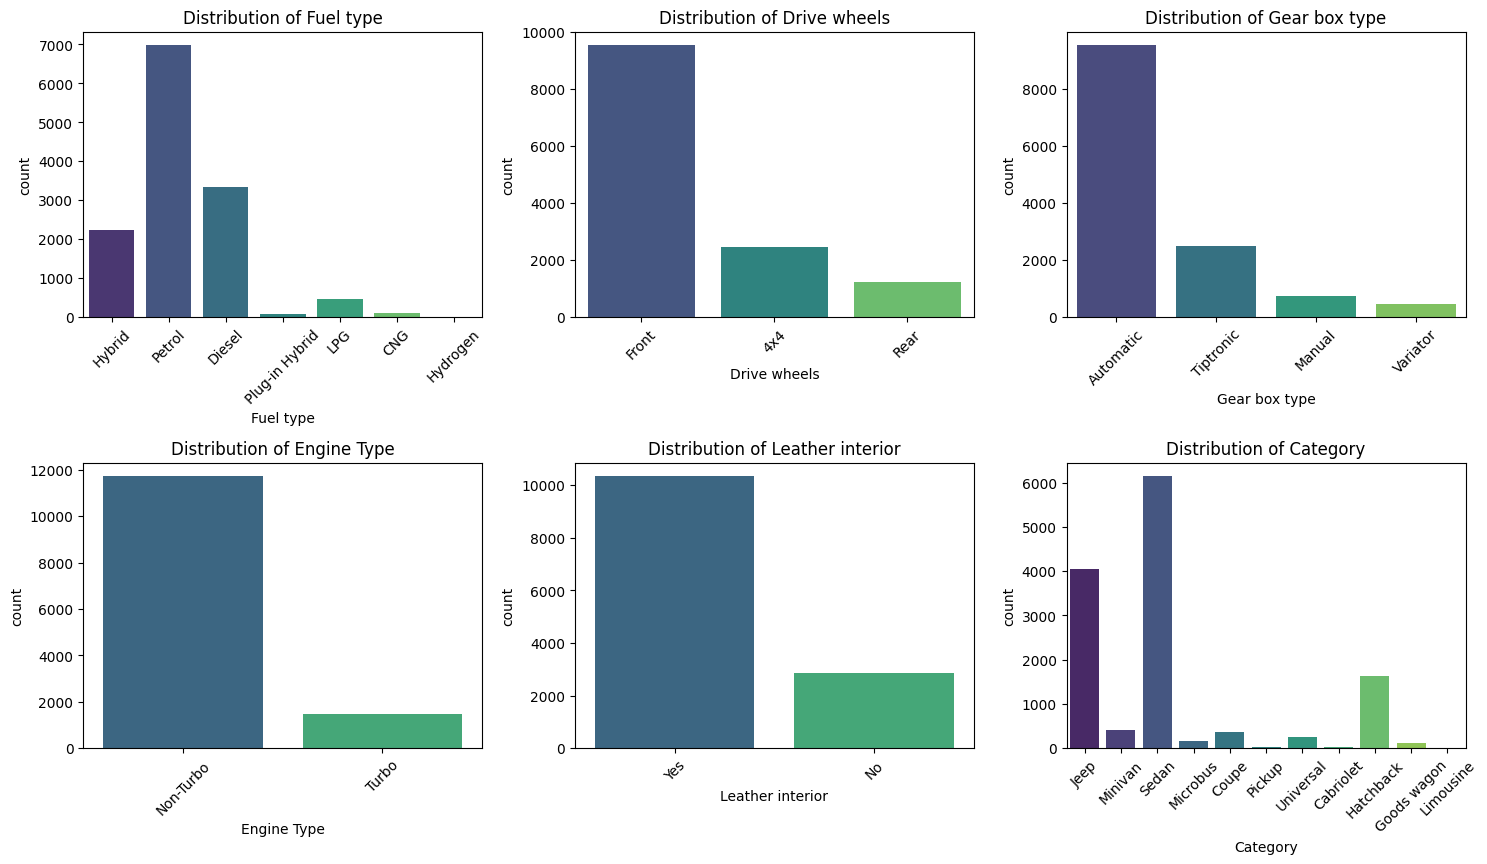

In [ ]:
# Define categorical features
categorical_features = ['Fuel type', 'Drive wheels', 'Gear box type', 'Engine Type', 'Leather interior', 'Category']

# Define the grid dimensions
rows, cols = 3, 3  # Adjust as needed for the number of plots
fig, axes = plt.subplots(rows, cols, figsize=(15, 12))  # Adjust size for better readability

# Flatten axes for easier iteration
axes = axes.flatten()

# Loop through features and create countplots
for i, feature in enumerate(categorical_features):
    sns.countplot(x=df[feature], palette='viridis', ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].tick_params(axis='x', rotation=45)

# Hide unused subplots if the grid is larger than the number of features
for j in range(len(categorical_features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# **Building the Pipeline**




In [ ]:
# Split data into features and target
X = df.drop(columns=['Price', 'Log_Price'])  # Keep all columns except 'Price' and 'Log_Price'
y = df['Log_Price']  # Use the log-transformed price as the target variable

# Split the data into training and testing sets (80% train, 20% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List of numerical features
numerical_features = [ 'Engine volume', 'Mileage', 'Cylinders', 'Doors', 'Airbags', 'Age']

# List of categorical features
categorical_features = ['Fuel type', 'Drive wheels', 'Engine Type', 'Category', 'Color', 'Leather interior', 'Gear box type']

# Preprocessing for numerical features: scaling
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # Scaling the numeric features
])

# Preprocessing for categorical features: One-Hot Encoding
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # OneHotEncoding for nominal features
])

# Combine preprocessing for both types of features using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Build the preprocessing pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Apply the preprocessing pipeline to the training and testing data
X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

preprocessor



ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['Engine volume', 'Mileage', 'Cylinders',
                                  'Doors', 'Airbags', 'Age']),
                                ('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Fuel type', 'Drive wheels', 'Engine Type',
                                  'Category', 'Color', 'Leather interior',
                                  'Gear box type'])])

In [ ]:
features = [i for i in df.columns if i not in ['Price', 'Log_Price']]
display(features)

['Category',
 'Leather interior',
 'Fuel type',
 'Engine volume',
 'Mileage',
 'Cylinders',
 'Gear box type',
 'Drive wheels',
 'Doors',
 'Color',
 'Airbags',
 'Engine Type',
 'Age']

# **ML Models**

Define Function to print ML Model Results

In [ ]:
# Defining a function to print evaluation matrix
def evaluate_model(model, y_test, y_pred):

    # Apply inverse log transformation to y_test and y_pred as we have used log transformation
    y_t = np.exp(y_test)
    y_p = np.exp(y_pred)
    y_train2 = np.exp(y_train)
    y_train_pred = np.exp(model.predict(X_train))

    # Calculating Evaluation Matrix
    mse = mean_squared_error(y_t, y_p)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_t, y_p)
    r2_train = r2_score(y_train2, y_train_pred)
    r2 = r2_score(y_t, y_p)
    r2_adjusted = 1 - (1 - r2) * ((X_test.shape[0] - 1) / (X_test.shape[0] - X_test.shape[1] - 1))

    # Printing Evaluation Matrix (rounded to 2 decimals)
    print("MSE :", round(mse, 3))
    print("RMSE :", round(rmse, 3))
    print("MAE :", round(mae, 3))
    print("Train R2 :", round(r2_train, 3))
    print("Test R2 :", round(r2, 3))
    print("Adjusted R2 :", round(r2_adjusted, 3))

    # Plot actual and predicted values
    plt.figure(figsize=(12, 4))
    plt.plot(y_p[:100])
    plt.plot(np.array(y_t)[:100])
    plt.legend(["Predicted", "Actual"])
    plt.title('Actual and Predicted Price', fontsize=12)

    # Calculate feature importance
    try:
        importance = model.feature_importances_
    except AttributeError:  # For models like linear regression
        importance = model.coef_
    importance = np.absolute(importance)

    # Adjust importance if needed
    if len(importance) == len(features):
        pass
    else:
        importance = importance[0]

    # Return rounded evaluation scores
    model_score = [round(mse, 3), round(rmse, 3), round(mae, 3), round(r2_train, 3), round(r2, 3), round(r2_adjusted, 3)]
    return model_score


Define a function to give Best Features

In [ ]:

# Function to get the top 5 features and plot them (works for all supported models)
def get_top_5_features_and_plot(model, feature_names):

    # Check if the model has `coef_` (Linear Models) or `feature_importances_` (Tree-based Models)
    if hasattr(model, 'coef_'):
        # For linear models
        importances = model.coef_
    elif hasattr(model, 'feature_importances_'):
        # For tree-based models
        importances = model.feature_importances_
    else:
        raise ValueError("Model does not have coefficients or feature_importances_ attribute")

    # Map feature importances to feature names
    feature_importance_map = {name: importance for name, importance in zip(feature_names, importances) if importance > 0}

    # Sort features by their importance values (highest first)
    sorted_features = sorted(feature_importance_map.items(), key=lambda x: x[1], reverse=True)

    # Select the top 5 features
    top_5 = {name: importance for name, importance in sorted_features[:5]}

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.barh(list(top_5.keys()), list(top_5.values()), color='#1f77b4')
    plt.xlabel('Importance Value')
    plt.title('Top 5 Features by Model Impact')
    plt.gca().invert_yaxis()  # To display the highest bar on top
    plt.tight_layout()
    plt.show()

    # Return the dictionary of top features
    return top_5


Create a score dataframe

In [ ]:
score = pd.DataFrame(index = ['MSE', 'RMSE', 'MAE', 'Train R2', 'Test R2', 'Adjusted R2'])

## Linear Regression

MSE : 195820958.582
RMSE : 13993.604
MAE : 9575.882
Train R2 : 0.263
Test R2 : 0.245
Adjusted R2 : 0.23


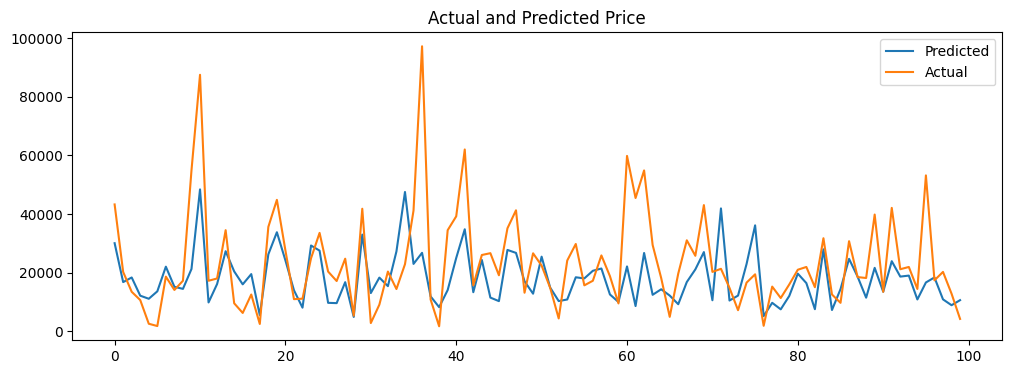

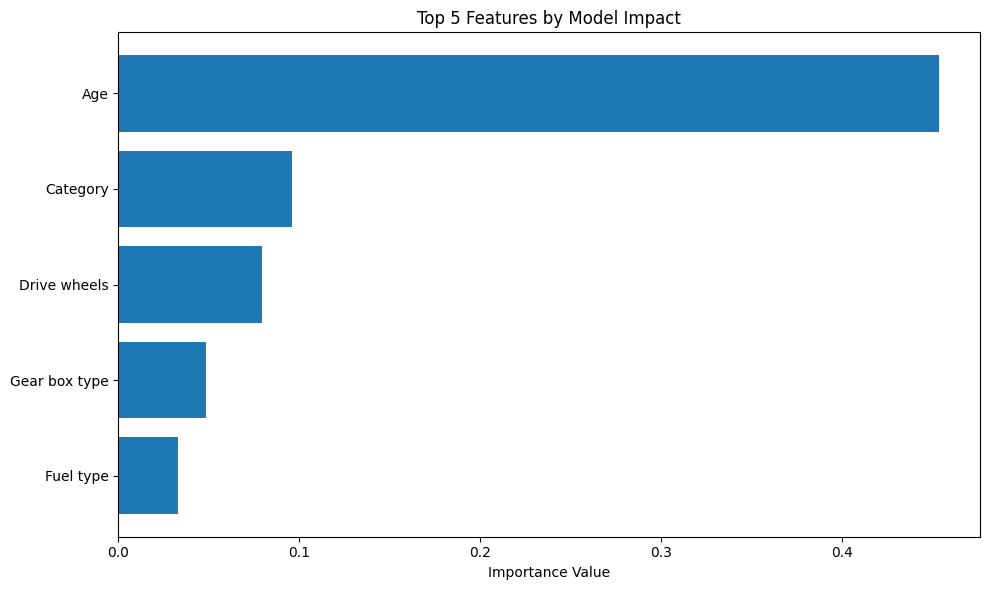

In [ ]:
# Import the LinearRegression class
reg = LinearRegression()

# Fit the linear regression model to the training data
reg.fit(X_train, y_train)

# Predict on the model
y_pred_li = reg.predict(X_test)

# Visualizing evaluation Metric Score chart
linear_score = evaluate_model(reg, y_test,y_pred_li)
score['Linear regression'] = linear_score

top_5_features = get_top_5_features_and_plot(reg, features)


### Cross Validation & Hyperparameter Tuning

In [ ]:
# Define the model
reg = LinearRegression()

# Define the parameters to be optimized
param_grid = {'fit_intercept': [True, False]}

# Perform grid search
grid_search = GridSearchCV(reg, param_grid, cv=5, scoring='r2', return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False]},
             return_train_score=True, scoring='r2')

In [ ]:
# Print the best parameters and the corresponding score
print("Best parameters: ", grid_search.best_params_)
print("Best R2 score: ", grid_search.best_score_)

Best parameters:  {'fit_intercept': True}
Best R2 score:  0.28281589582632594


In [ ]:
# Use the best parameter to train the model
best_reg = grid_search.best_estimator_
best_reg.fit(X_train, y_train)

LinearRegression()

MSE : 195820958.582
RMSE : 13993.604
MAE : 9575.882
Train R2 : 0.263
Test R2 : 0.245
Adjusted R2 : 0.23


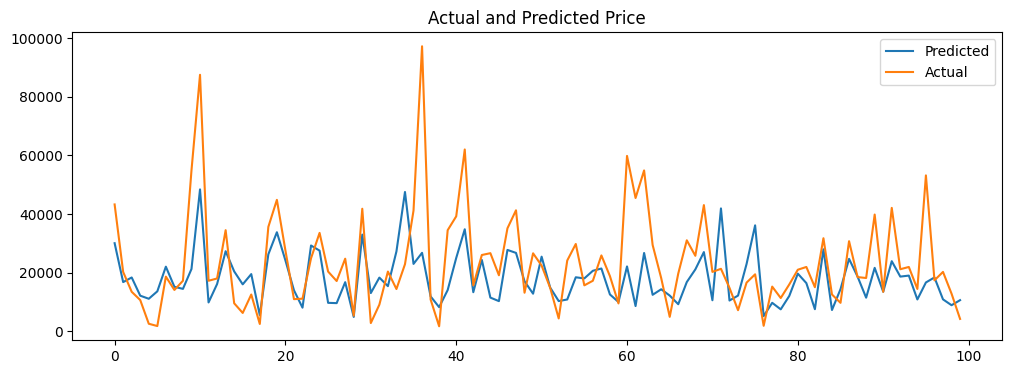

In [ ]:
# Predict on test data
y_pred_li2 = best_reg.predict(X_test)

# Visualizing evaluation Metric Score chart
linear_score2 = evaluate_model(best_reg, y_test,y_pred_li2)

score['Linear regression tuned'] = linear_score2

The Linear Regression model performed fairly well, with a test R² score of 0.245, meaning it could explain about 24.5% of the variation in car prices. The RMSE was 13,993.60, and the MAE was 9,575.88, showing that there were some sizable differences between the predicted and actual values. The feature importance analysis showed that “Age” had the most impact on price predictions, followed by “Category,” “Drive Wheels,” “Gear Box Type,” and “Fuel Type.” While the model captured some overall trends, the actual vs. predicted price chart shows it struggled with larger fluctuations, especially for extreme values. Overall, it provided a reasonable starting point but had limitations in capturing more complex patterns.



---



### Lasso Regression

MSE : 293866248.296
RMSE : 17142.527
MAE : 11482.977
Train R2 : -0.126
Test R2 : -0.134
Adjusted R2 : -0.156


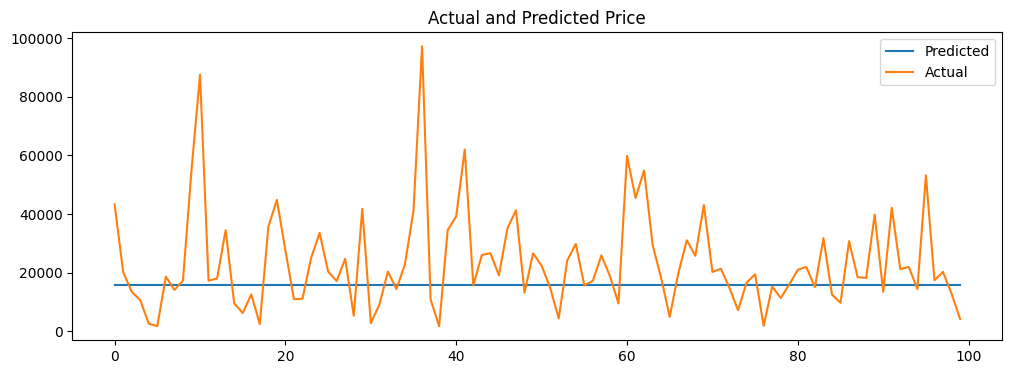

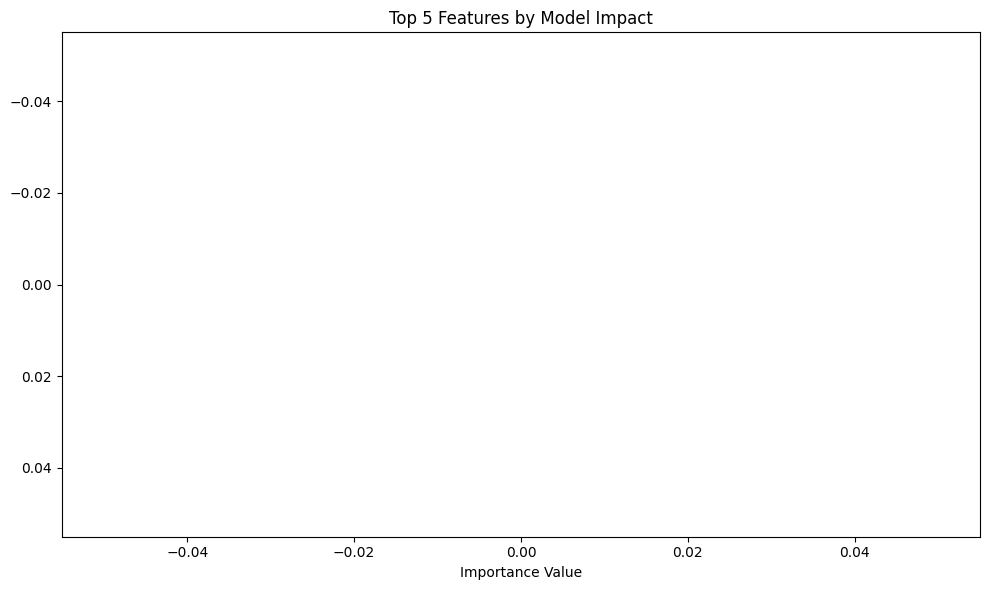

In [ ]:
# Import the Lasso Regression class
lasso = Lasso()

# Fit the lasso regression model to the training data
lasso.fit(X_train, y_train)

# Predict on the model
y_pred_lasso1 = lasso.predict(X_test)

# Visualizing evaluation Metric Score chart
lasso_score = evaluate_model(lasso, y_test,y_pred_lasso1)
score['Lasso regression'] = lasso_score

top_5_features = get_top_5_features_and_plot(lasso, features)

The Lasso Regression model performed poorly, with a test R² score of -0.134, indicating it could not effectively explain the variance in car prices. The RMSE of 17,142.53 and MAE of 11,482.98 highlight significant errors in its predictions. The predicted vs. actual plot reveals that the model largely failed to capture any trends, often predicting a constant value regardless of the actual data. Additionally, the feature importance analysis showed no significant impact from any individual feature, likely due to the model overly penalizing coefficients to zero. This result suggests Lasso was not suitable for this dataset and required further adjustments or a different approach to perform effectively.



---



### Ridge Regression

MSE : 195833783.874
RMSE : 13994.062
MAE : 9576.928
Train R2 : 0.263
Test R2 : 0.244
Adjusted R2 : 0.23


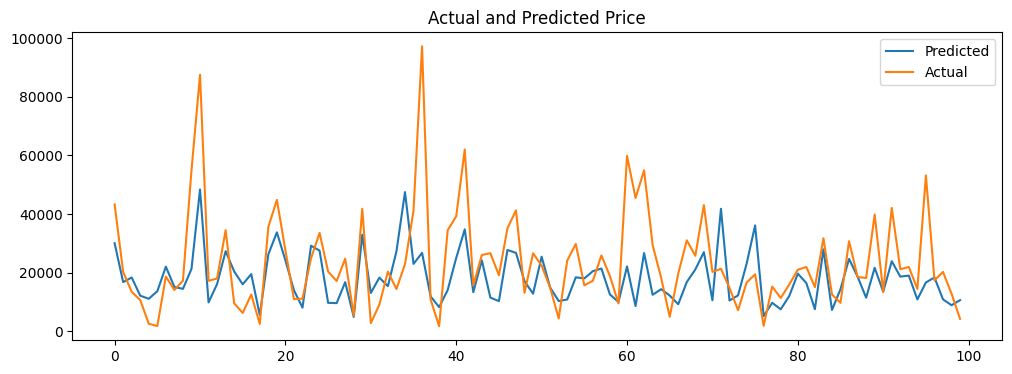

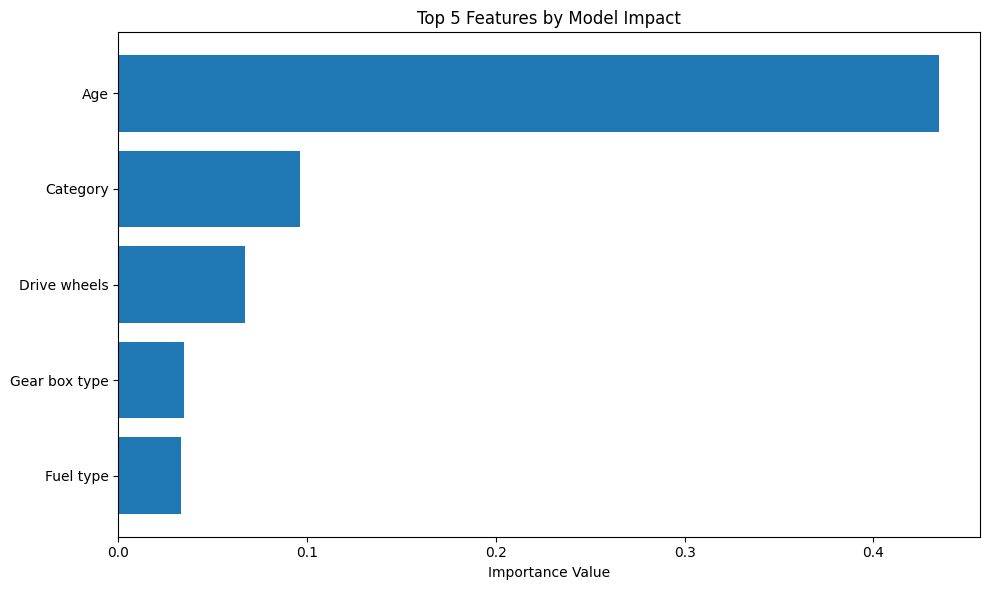

In [ ]:
# Ridge regressor class
ridge = Ridge()

# Fit the ridge regression model to your training data
ridge.fit(X_train, y_train)

# Predict on the model
y_pred_ridge1 = ridge.predict(X_test)

# Visualizing evaluation Metric Score chart
result = evaluate_model(ridge, y_test,y_pred_ridge1)
score['Ridge'] = result

top_5_features = get_top_5_features_and_plot(ridge, features)

The Ridge Regression model performed similarly to the Linear Regression model, achieving a test R² score of 0.244 and an adjusted R² of 0.23. The RMSE was 13,994.06, and the MAE was 9,576.93, indicating moderate predictive accuracy. The feature importance analysis highlighted “Age” as the most significant predictor, followed by “Category,” “Drive Wheels,” “Gear Box Type,” and “Fuel Type.” The predicted vs. actual price plot shows that the model captured some overall trends but struggled with large variations, especially for outliers. While the Ridge model introduced regularization to reduce overfitting, its overall performance remained comparable to that of the Linear Regression model.



---



## Decision Tree

MSE : 107292765.034
RMSE : 10358.222
MAE : 5839.002
Train R2 : 0.981
Test R2 : 0.586
Adjusted R2 : 0.578


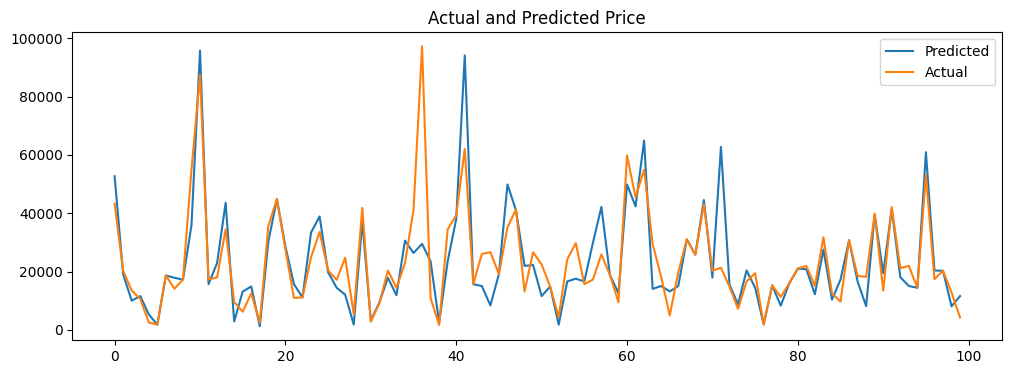

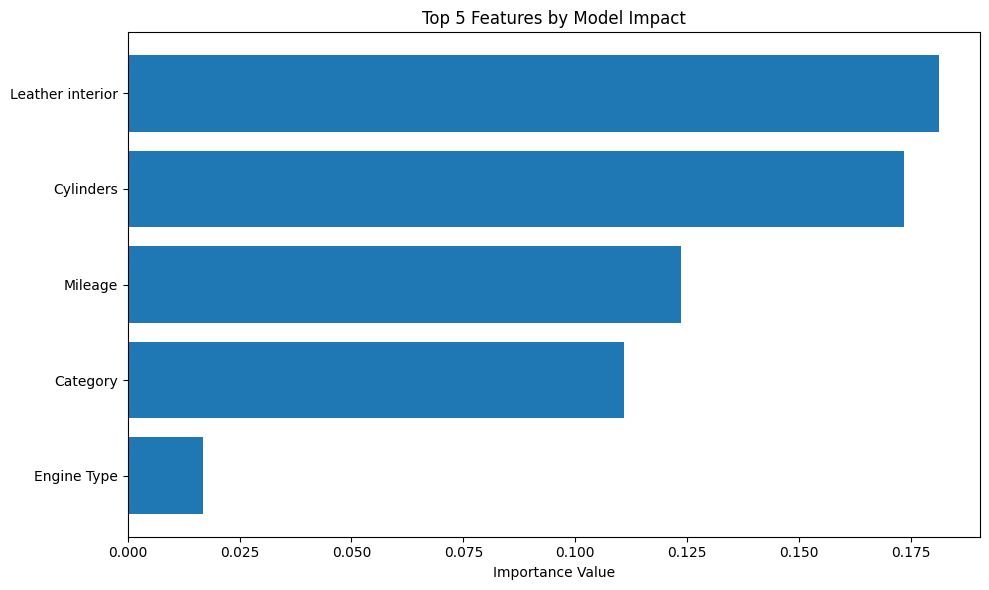

In [ ]:
# Import Decision Tree Regressor class
dt = DecisionTreeRegressor(random_state=1)

# Fit the Decision Tree model to your training data
dt.fit(X_train,y_train)

# Predict on the model
y_pred_dt1 = dt.predict(X_test)

# Visualizing evaluation Metric Score chart
result = evaluate_model(dt, y_test,y_pred_dt1)
score['Decision tree'] = result

top_5_features = get_top_5_features_and_plot(dt, features)

### Cross Validation and Hyperparameter Tuning

Best parameters:  {'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 10}
Best R2 score from cross-validation:  0.601168668433349

Evaluation for the best-tuned Decision Tree model:
MSE : 109907891.686
RMSE : 10483.696
MAE : 6282.32
Train R2 : 0.743
Test R2 : 0.576
Adjusted R2 : 0.568


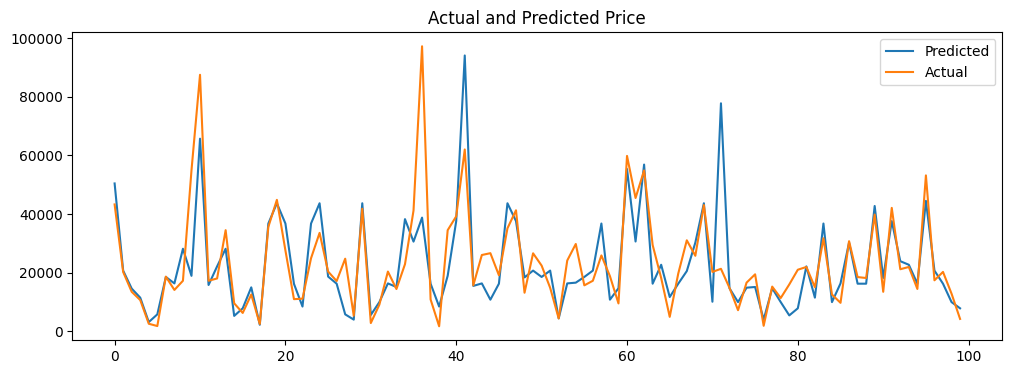

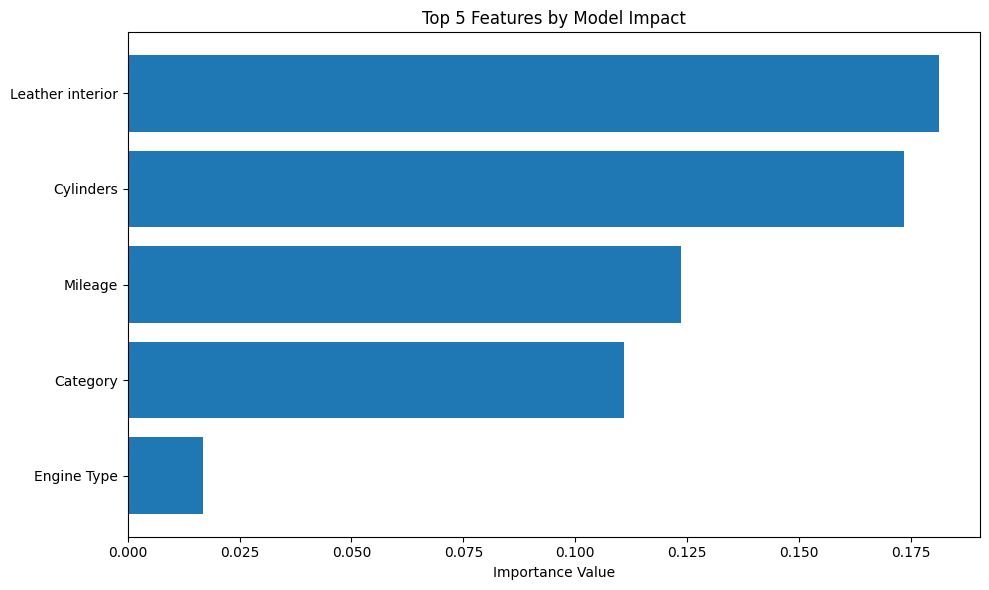

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV

# Define the Decision Tree model
tree = DecisionTreeRegressor(random_state=42)

# Define the parameter distribution for tuning
param_dist = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

# Perform Randomized Search for hyperparameter tuning
random_search_tree = RandomizedSearchCV(
    estimator=tree,
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    scoring='r2',
    random_state=42,
    return_train_score=True
)

# Fit RandomizedSearchCV
random_search_tree.fit(X_train, y_train)

# Get the best parameters and model
print("Best parameters: ", random_search_tree.best_params_)
print("Best R2 score from cross-validation: ", random_search_tree.best_score_)

# Re-fit the best model
best_tree = random_search_tree.best_estimator_
best_tree.fit(X_train, y_train)

# Predict and evaluate
y_pred_tree = best_tree.predict(X_test)
print("\nEvaluation for the best-tuned Decision Tree model:")
evaluate_model(best_tree, y_test, y_pred_tree)

top_5_features = get_top_5_features_and_plot(dt, features)


The Decision Tree model demonstrated strong performance with a Train R² of 0.981 and a Test R² of 0.586, along with a comparatively lower RMSE (10,358) and MAE (5,839). Key features such as Leather Interior, Cylinders, Mileage, Category, and Engine Type emerged as significant drivers of predictions. While the Decision Tree effectively captured trends in the data and provided solid predictive accuracy, it is not the most reliable model compared to Random Forest, which is expected to offer enhanced generalization and robustness.



---



## Random Forest

MSE : 77643998.001
RMSE : 8811.583
MAE : 4872.013
Train R2 : 0.933
Test R2 : 0.7
Adjusted R2 : 0.695


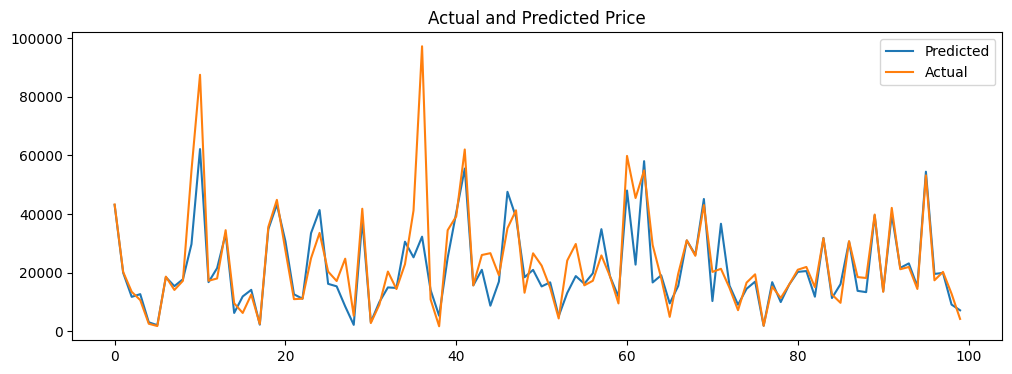

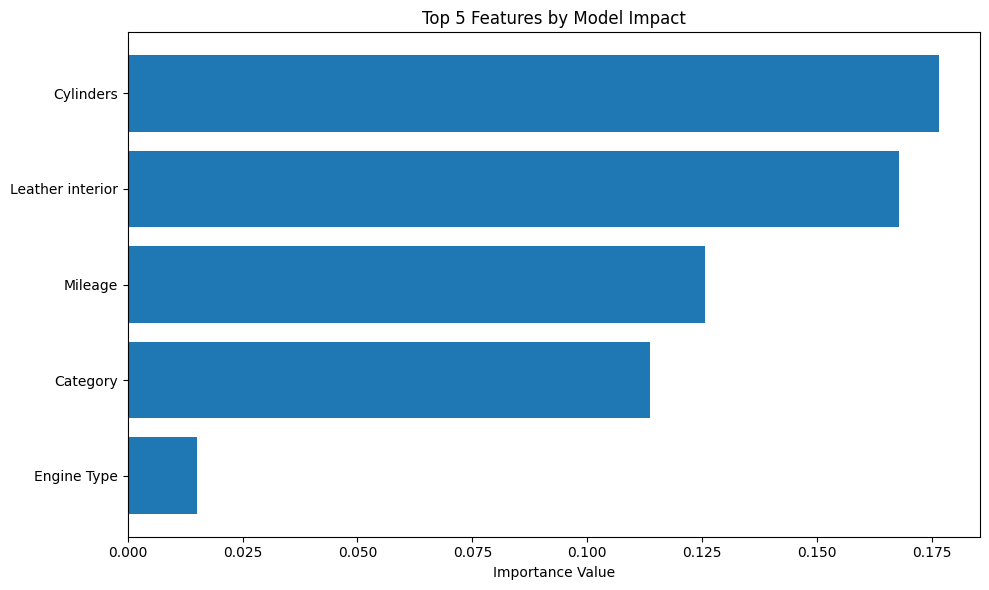

In [ ]:
# Import Random Forest Regressor class
rf = RandomForestRegressor(random_state=0)

# Fit the Random Forest model to your training data
rf.fit(X_train,y_train)

# Predict on the model
y_pred_rf1 = rf.predict(X_test)

# Visualizing evaluation Metric Score chart
result = evaluate_model(rf, y_test,y_pred_rf1)
score['Random forest'] = result

top_5_features = get_top_5_features_and_plot(rf, features)

### Cross Validation and Hyperparameter Tuning

In [ ]:
# Random forest model
rf_model = RandomForestRegressor(random_state=0)
rf_params = {'n_estimators':[300],                    # limited due to computational power availability
             'min_samples_leaf':np.arange(20,25)}     # Approximate range from a decision tree model

# Fitting a Random Forest model with best parameters obtained from gridsearch
rf_gridsearch = GridSearchCV(rf_model,rf_params,cv=6,scoring='neg_root_mean_squared_error')
rf_gridsearch.fit(X_train,y_train)
rf_best_params = rf_gridsearch.best_params_

# Best parameters for random forests
rf_best_params

{'min_samples_leaf': 20, 'n_estimators': 300}

In [ ]:
# Building Random Forest model with best parameters
rf_model = RandomForestRegressor(n_estimators=rf_best_params['n_estimators'],
                                 min_samples_leaf=rf_best_params['min_samples_leaf'],
                                 random_state=0)


# Fitting model
rf_model.fit(X_train,y_train)

RandomForestRegressor(min_samples_leaf=20, n_estimators=300, random_state=0)

MSE : 105694114.179
RMSE : 10280.764
MAE : 6043.624
Train R2 : 0.666
Test R2 : 0.592
Adjusted R2 : 0.584


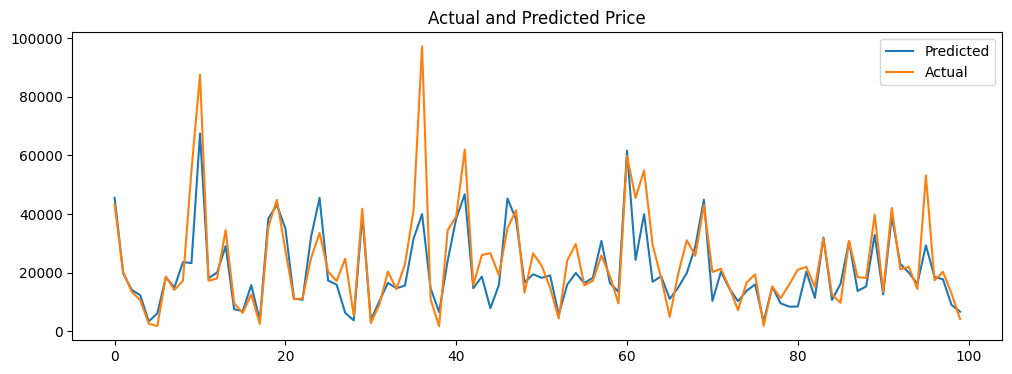

In [ ]:
# Predict on the model
y_pred_rf = rf_model.predict(X_test)

# Evaluation matrices for RandomForest
result = evaluate_model(rf_model, y_test,y_pred_rf)
score['Random forest tuned'] = result

The Random forest model consistently emerged as the most reliable across evaluations. It achieved a high R^2 score of 0.7 on the test set, indicating that it explains a significant portion of the variance in the data. The mean squared error (MSE) and root mean squared error (RMSE) were the lowest among all models, demonstrating better prediction accuracy. Additionally, the actual vs. predicted chart shows a strong alignment, further confirming its superior performance. Key features identified by the random forest model include cylinders, leather interior, mileage, and category, suggesting these factors play a vital role in predicting outcomes. Overall, random forest proved to be the most robust model, with clear advantages over simpler linear methods and other advanced models like Lasso, Ridge, and Decision Trees.



---



## Gradient Boosting

MSE : 121134429.714
RMSE : 11006.109
MAE : 6819.341
Train R2 : 0.582
Test R2 : 0.533
Adjusted R2 : 0.523


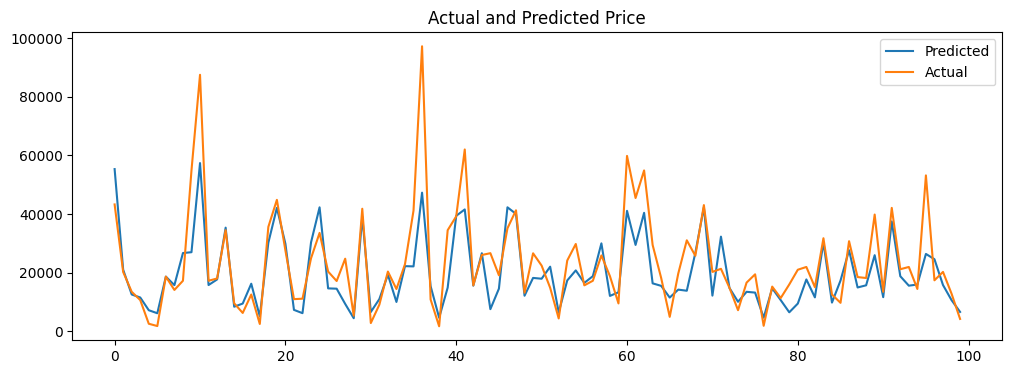

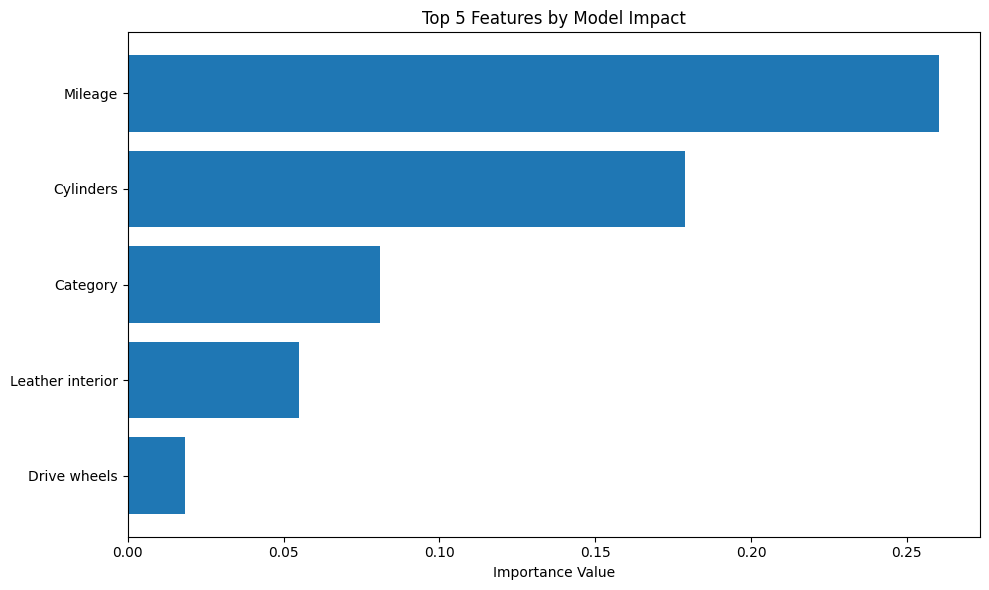

In [ ]:
# Import Gradient Boosting Regressor class
gb = GradientBoostingRegressor(random_state=0)

# Fit the Gradient Boosting model to the training data
gb.fit(X_train,y_train)

# Predict on the model
y_pred_gb1 = gb.predict(X_test)

# Visualizing evaluation Metric Score chart
result = evaluate_model(gb, y_test,y_pred_gb1)
score['Gradient Boosting Regressor'] = result

top_5_features = get_top_5_features_and_plot(gb, features)

The Gradient Boosting Regressor showed moderate performance with a test R² of 0.533 and an RMSE of 11,006.11, indicating that it captured some patterns in the data but struggled with predictive accuracy compared to more robust models like Random Forest. The feature importance analysis highlighted mileage, cylinders, and category as the top contributors, emphasizing their significant role in determining car prices. While Gradient Boosting performed decently, it fell short in achieving the precision and generalization exhibited by other models in the analysis.



---



## Extreme Gradient Boosting

MSE : 91661301.49
RMSE : 9573.991
MAE : 5622.889
Train R2 : 0.829
Test R2 : 0.646
Adjusted R2 : 0.639


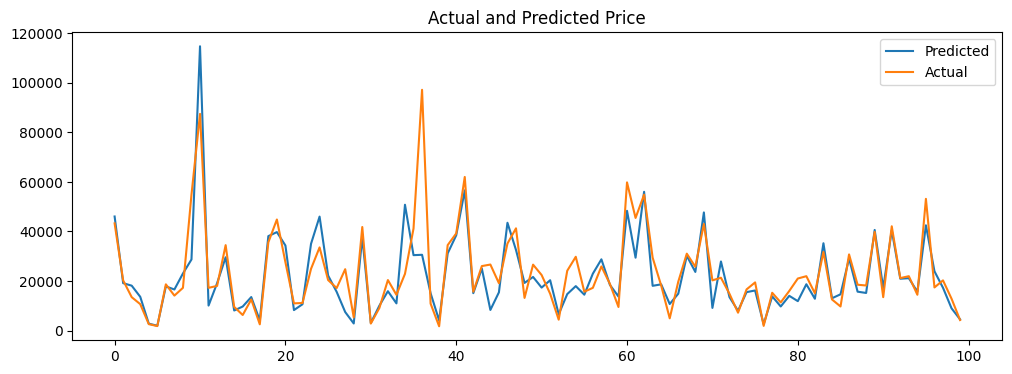

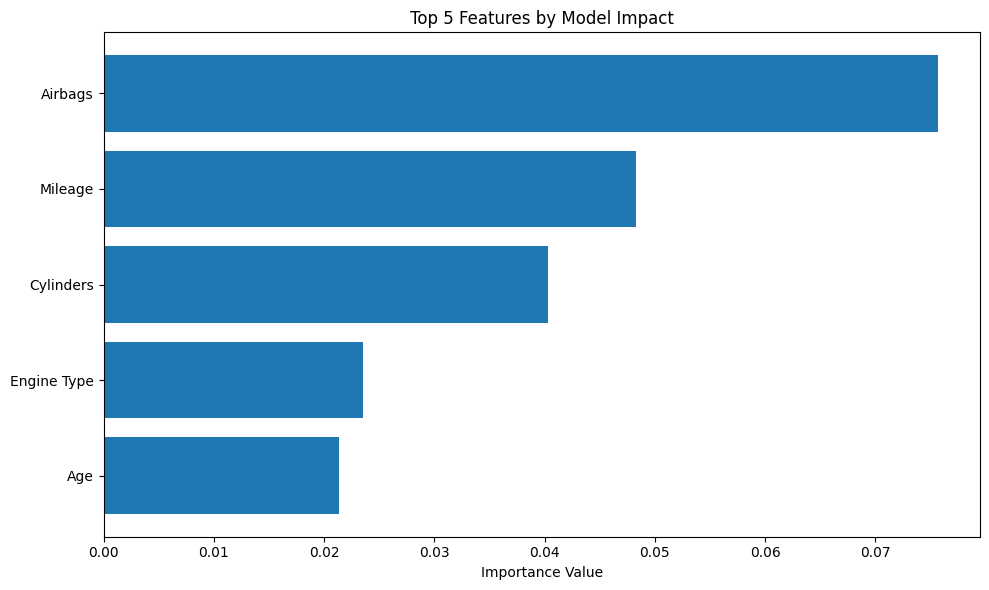

In [ ]:
# Import Extreme Gradient Boosting Regressor class
xgb_model = xgb.XGBRegressor(random_state=0,
                             objective='reg:squarederror')

# Fit the Extreme Gradient Boosting model to the training data
xgb_model.fit(X_train,y_train)

# Predict on the model
y_pred_xgb1 = xgb_model.predict(X_test)

# Visualizing evaluation Metric Score chart
result = evaluate_model(xgb_model, y_test,y_pred_xgb1)
score['Extreme Gradient Boosting Regressor'] = result

top_5_features = get_top_5_features_and_plot(xgb_model, features)

Extreme Gradient Boosting (XGBoost) performed well in modeling the data, demonstrating a balance between train and test performance. It achieved a Mean Squared Error (MSE) of approximately 91,661,301, a Root Mean Square Error (RMSE) of around 9,573, and a Mean Absolute Error (MAE) of 5,623. The model’s train  R^2  score was 0.829, and its test  R^2  score was 0.646, with an adjusted  R^2  of 0.639. This indicates that XGBoost generalized well to unseen data while maintaining strong training performance. The top features influencing the predictions included airbags, mileage, cylinders, engine type, and age, suggesting these factors are key contributors to the outcomes in the dataset. Overall, XGBoost shows potential as a robust model for this dataset, especially for scenarios emphasizing predictive accuracy.



---



## Comparing Performance of each Model

In [ ]:
# Format all numeric values in the DataFrame to 3 decimal places without scientific notation
pd.set_option('display.float_format', '{:.3f}'.format)

# Alternatively, to specifically convert to normal float formatting:
score_rounded = score.applymap(lambda x: f"{x:.3f}" if isinstance(x, (float, int)) else x)

# Display the formatted DataFrame
display(score_rounded)


,Linear regression,Linear regression tuned,Lasso regression,Ridge,Decision tree,Random forest,Random forest tuned,Gradient Boosting Regressor,Extreme Gradient Boosting Regressor
MSE,195820958.582,195820958.582,293866248.296,195833783.874,107292765.034,77643998.001,105694114.179,121134429.714,91661301.490
RMSE,13993.604,13993.604,17142.527,13994.062,10358.222,8811.583,10280.764,11006.109,9573.991
MAE,9575.882,9575.882,11482.977,9576.928,5839.002,4872.013,6043.624,6819.341,5622.889
Train R2,0.263,0.263,-0.126,0.263,0.981,0.933,0.666,0.582,0.829
Test R2,0.245,0.245,-0.134,0.244,0.586,0.700,0.592,0.533,0.646
Adjusted R2,0.230,0.230,-0.156,0.230,0.578,0.695,0.584,0.523,0.639


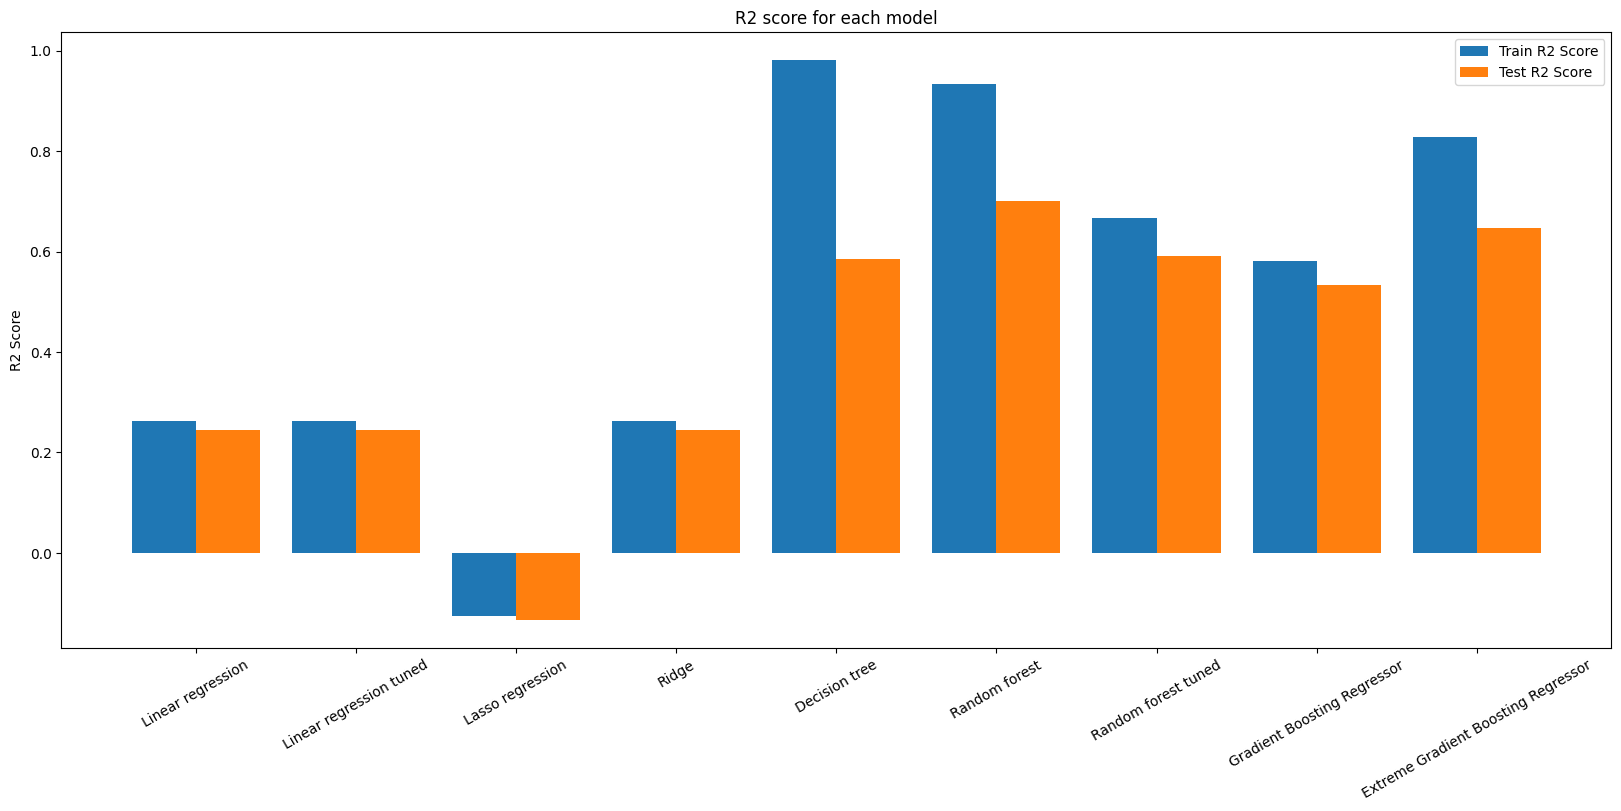

In [ ]:
score.columns

# R2 Scores plot

models = list(score.columns)
train = score.iloc[-3,:]
test = score.iloc[-2,:]

X_axis = np.arange(len(models))

plt.figure(figsize=(20,8))
plt.bar(X_axis - 0.2, train, 0.4, label = 'Train R2 Score')
plt.bar(X_axis + 0.2, test, 0.4, label = 'Test R2 Score')


plt.xticks(X_axis,models, rotation=30)
plt.ylabel("R2 Score")
plt.title("R2 score for each model")
plt.legend()
plt.show()

Among all the models, Random Forest (untuned) emerged as the most reliable, with the highest test R² of 0.700 and the lowest error metrics (MSE: 77.64M, MAE: 4872), making it the best performer overall. Extreme Gradient Boosting also performed well with a test R² of 0.646, though its error metrics were slightly higher. Decision Tree showed moderate performance (test R²: 0.586) but suffered from overfitting, as indicated by its high training R² of 0.981. Gradient Boosting had weaker results (test R²: 0.533) and higher error rates, while Linear and Ridge regressions underperformed significantly with low R² values (~0.23) and high errors. Lasso regression failed entirely, with negative R² values. Random Forest’s robust performance and balance between training and test metrics make it the most suitable model for this task.



---



# Conclusion & Key Insights

The Random Forest model was selected as the primary model for analysis due to its superior performance in terms of accuracy and robustness compared to other models. It exhibited the highest R² score on the test dataset, effectively capturing the non-linear relationships in the data and handling feature importance evaluation efficiently.

## **Reason for Choosing the Model:**

•	Achieved the highest Test R² score of 0.7 among all models, indicating better predictive accuracy.

•	Handles complex, non-linear relationships effectively.



## **Key Findings:**

•	**Cylinders**: Indicate a strong preference for powerful vehicles, aligning with the developed highway infrastructure in the US.

•	**Leather Interior**: Highlights a significant demand for vehicles with luxurious and aesthetic features.

•	**Mileage**: Shows the importance of product durability and cost efficiency, with robust cars being highly valued by consumers.

•	**Category**: Sedans and Jeeps dominate the market, reflecting consumer sensitivity to car types.

•	**Engine Type**: Suggests a preference for fuel-efficient yet high-performance engines that balance functionality with design.






---



# Challenges

- **The Project Faced the Following Challenges:**

  - **High Dimensionality and Poor Base Model Performance:**  
    - Extensive one-hot encoding resulted in over 1,000 features, making Recursive Feature Elimination (RFE) impractical. Models like Lasso Regression performed poorly due to noise, multicollinearity, and significant disparities in predictions from basic linear regression.
    - **Solution**: Used domain knowledge to manually eliminate less relevant features (e.g., doors, models, manufacturers), reducing complexity while retaining key information.  

  - **Outliers in the Dataset:**  
    - Outliers included car prices as low as $3, unrealistically high prices, and vehicle ages exceeding 70 years.  
    - **Solution**: Applied techniques like interquartile range (IQR) filtering and a 99th percentile threshold to remove outliers.  

  - **Model Overfitting:**  
    - The model exhibits a fair amount of overfitting as indicated by the disparity between the train and test R2.
    - **Solution:** To address overfitting, regularization techniques (e.g., pruning) and hyperparameter tuning (e.g., optimizing `max_depth`, `min_samples_split`, and `min_samples_leaf`) were implemented. Cross-validation was used to ensure model robustness and prevent reliance on specific data subsets.



---



# Future Steps

 **Future Steps for Model Improvement:**

  - **Acquire more data to expand the Training & Testing dataset:**
    - Collecting additional data can improve model performance by capturing more variability and reducing overfitting, leading to better generalization on unseen data.

  - **Exploration of Ensemble Methods:**
    - Consider stacking ensemble methods on models like Random Forest, Gradient Boosting, and Extreme Gradient Boosting to combine their complementary strengths and potentially improve predictive accuracy.

  - **Managing Model Complexity:**
    - Stacking methods may increase model complexity, making it harder to interpret and raising the risk of overfitting.
    - Employ techniques like cross-validation and careful hyperparameter tuning to mitigate overfitting risks.

  - **Simplifying the Feature Space:**
    - Use feature engineering or dimensionality reduction to streamline the dataset, helping to balance the trade-off between model complexity and performance.




---



# Generative AI Disclosure

- **Generative AI Disclosure:**

  - **Tools Utilized:**
    - OpenAI’s ChatGPT was employed to summarize model results and assist in drafting some sections of this report.
    - Claude was used to debug and refine code implementations.

  - **Purpose of Use:**
    - These tools enhanced efficiency and clarity in both the analytical and documentation processes.

  - **Validation Process:**
    - All decisions, interpretations, and final evaluations were thoroughly reviewed and validated by the project team to ensure accuracy and reliability.




---

